In [2]:
%load_ext rpy2.ipython

Here is some practice project about working with *ggtrends*.

For this mini piece, I'm just wondering if a few of my favorite shows that have the same genre/type such as "**Vikings**", "**The Witcher**", and "**The Last Kingdom**" spike together in popularity as people tend to look for similar shows when they are done binge-watching one. Most likely the spikes will also be visible at each shows release of a new season.

In [ ]:
%%R
# Installing packages
install.packages("ggplot2")
install.packages("tidyverse")
 

In [ ]:
%%R
install.packages("magrittr")
install.packages("gtrendsR")
install.packages("quantmod")

In [10]:
%%R
library(tidyverse)
library(gtrendsR)
library(quantmod)
library(ggplot2)

Time to gather the data from google trends by searching for keywords.

In [11]:
%%R

trends <- gtrends(keyword=c("Vikings", "The Last Kingdom","Valhalla","Witcher"))
trends_over_time <- trends$interest_over_time
trends_over_time <- trends_over_time %>% mutate(hits = as.numeric(hits))
trends_over_time <- trends_over_time %>% replace_na(list(hits = 0))
head(trends_over_time)
tail(trends_over_time)

           date hits keyword   geo      time gprop category
1039 2022-05-15    3 Witcher world today+5-y   web        0
1040 2022-05-22    3 Witcher world today+5-y   web        0
1041 2022-05-29    3 Witcher world today+5-y   web        0
1042 2022-06-05    3 Witcher world today+5-y   web        0
1043 2022-06-12    3 Witcher world today+5-y   web        0
1044 2022-06-19    3 Witcher world today+5-y   web        0


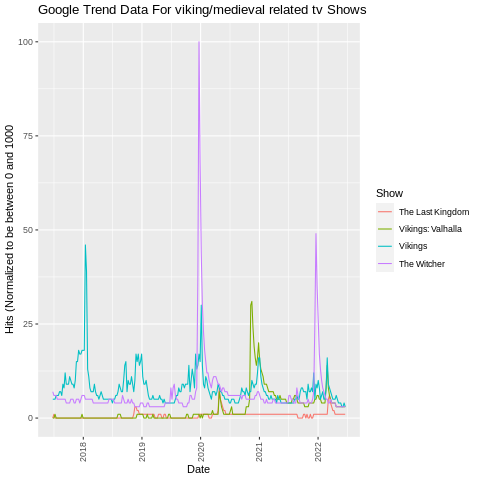

In [15]:
%%R
# Plotting the trends

viz <- trends_over_time %>%
    ggplot() + geom_line(aes(x = date, hits, color = keyword)) +
    scale_color_discrete(name = "Show", labels = c("The Last Kingdom", "Vikings: Valhalla",
                                                   "Vikings","The Witcher")) +
  labs(title = "Google Trend Data For viking/medieval related tv Shows",y = "Hits (Normalized to be between 0 and 1000", x = "Date") 
 
viz = viz + theme(axis.text.x = element_text(angle = 90, hjust = 2, vjust = 0.5))
viz


It appears that there is a popularity increase for all shows in the beginning of 2020, and 2022. It also correlates with their season release date.